<a href="https://colab.research.google.com/github/Oskarino/Lab2_PTD/blob/main/Lab2_PTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import math
from math import sin, cos, pi, sqrt, log
from cmath import exp
import time

In [2]:
f_s = 8000

phi = pi/120
funkcja_x = lambda t: sin(2*pi*f_s*t*cos(3*pi*t) + t*phi) 

#sekundy
T = 0.5

def generate_signal(funkcja, f_s, T):
  return [funkcja(n/f_s) for n in range(int(T*f_s))]

x = generate_signal(funkcja_x, f_s, T)

funkcja_y = lambda t: (2*t*sin(0.5*t*pi) + 1.5)*cos(9*pi*t+pi*t)
y = generate_signal(funkcja_y, f_s, T)

funkcja_z = lambda t: funkcja_x(t)*funkcja_y(t)+ abs(funkcja_x(t)+2)*(funkcja_y(t)**2 + 0.32)
z = generate_signal(funkcja_z, f_s, T)

funkcja_v = lambda t: sqrt(abs(funkcja_x(t)*funkcja_z(t)+10))*(abs(funkcja_y(t) + 1.2))*sin(2*pi*t)
v = generate_signal(funkcja_v, f_s, T)

T_u = 3.1

def funkcja_u(t):
  if t<0 or t >= 3.1:
    raise Exception("Wrong time!!")
  if t < 1.2:
    return (-t**2 + 0.5)*sin(30*pi*t)*log(t**2+1,2)
  if t < 2:
    return (1/t)*0.8*sin(24*pi*t)-0.1*t
  if t < 2.4:
    abs(sin(2*pi*t*2))**0.8
  if t < 3.1:
    return 0.23*sin(20*pi*t)*sin(12*pi*t)



u = generate_signal(funkcja_u, f_s, T_u)

f_s = 22.05
T = 1

from functools import partial

def funkcja_b_k(t, k):
  H = [2,20,40]
  return sum([(cos( 2*pi *h*t + sin(6*pi*t)))*((-1)**h)/(3*h**2) for h in range(1, H[k-1])])



b_1 = generate_signal(partial(funkcja_b_k,k=1), f_s, T_u)
b_2 = generate_signal(partial(funkcja_b_k,k=2), f_s, T_u)
b_3 = generate_signal(partial(funkcja_b_k,k=3), f_s, T_u)

## Zad 1

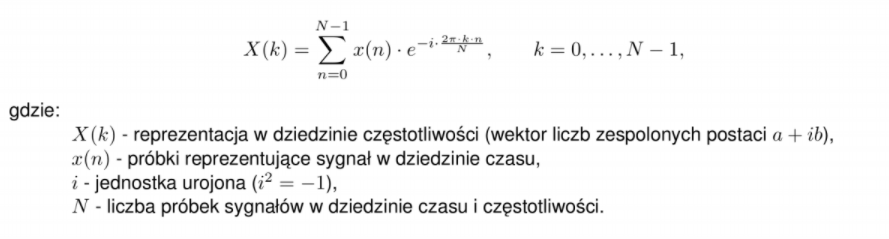

In [3]:
def DFT(x):
  N = len(x)
  if N % 2 == 0:
    dft = [sum([x[n] * exp(complex(0,-(2*pi*k*n)/N)) for n in range(N)]) for k in range(int(N/2))]
    dft.extend(reversed(dft))
  else:
    dft = [sum([x[n] * exp(complex(0,-(2*pi*k*n)/N)) for n in range(N)]) for k in range(int((N+1)/2))]
    dft.extend(reversed(dft[:-1]))
  return dft

In [4]:
start = time.time()

DFT_x = DFT(x)

end = time.time()

x_dft_time = end - start
print(x_dft_time)

5.323668479919434


## Zad 2


In [5]:
def widmo_amplitudowe(X):
    return [ sqrt(X[k].real**2 + X[k].imag**2) for k in range(len(X))]

In [6]:
N = len(x)

Widmo_x = widmo_amplitudowe(DFT_x[:int(N/2 - 1)])

In [7]:
M_prim = [10*log(Widmo_x[k],10) for k in range(int(N/2 - 1))]

In [8]:
skala_czestotliwosci = [k*(f_s/N) for k in range(int(N/2 - 1))]

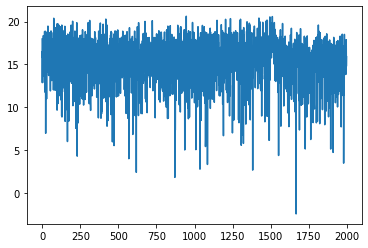

In [9]:
plt.plot(range(int(N/2 - 1)),M_prim)

## Zad 3

In [10]:
start = time.time()

DFT_y = DFT(y)

end = time.time()
y_dft_time = end - start
print(y_dft_time)
start = time.time()

DFT_z = DFT(z)

end = time.time()
z_dft_time = end - start
print(z_dft_time)
start = time.time()

DFT_v = DFT(v)

end = time.time()
v_dft_time = end - start
print(v_dft_time)
start = time.time()

DFT_u = DFT(u)

end = time.time()
u_dft_time = end - start
print(u_dft_time)
start = time.time()

DFT_b1 = DFT(b_1)

end = time.time()
b1_dft_time = end - start
print(b1_dft_time)
start = time.time()

DFT_b2 = DFT(b_2)

end = time.time()
b2_dft_time = end - start
print(b2_dft_time)
start = time.time()

DFT_b3 = DFT(b_3)

end = time.time()
b3_dft_time = end - start
print(b3_dft_time)

5.399975776672363
5.335984230041504
5.362835168838501
209.05371141433716
0.0015676021575927734
0.001542806625366211
0.0015680789947509766


In [11]:
Widmo_y = widmo_amplitudowe(DFT_y[:int(len(DFT_y)/2 - 1)])
Widmo_z = widmo_amplitudowe(DFT_z[:int(len(DFT_z)/2 - 1)])
Widmo_v = widmo_amplitudowe(DFT_v[:int(len(DFT_v)/2 - 1)])
Widmo_u = widmo_amplitudowe(DFT_u[:int(len(DFT_u)/2 - 1)])
Widmo_b1 = widmo_amplitudowe(DFT_b1[:int(len(DFT_b1)/2 - 1)])
Widmo_b2 = widmo_amplitudowe(DFT_b2[:int(len(DFT_b2)/2 - 1)])
Widmo_b3 = widmo_amplitudowe(DFT_b3[:int(len(DFT_b3)/2 - 1)])

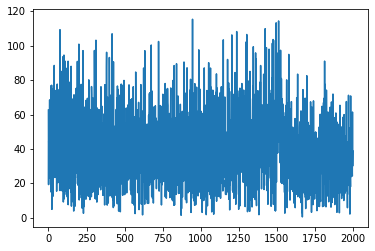

In [12]:
plt.plot(range(len(Widmo_x)), Widmo_x)

In [13]:
def table_log(seq):
  return [log(el,10) for el in seq] 

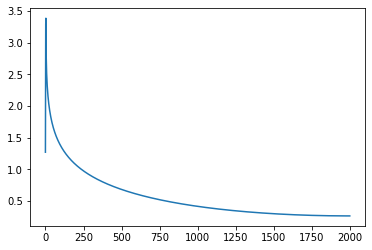

In [14]:
plt.plot(range(len(Widmo_y)), table_log(Widmo_y))

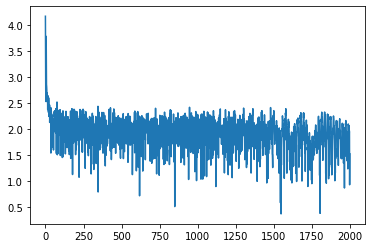

In [15]:
plt.plot(range(len(Widmo_z)), table_log(Widmo_z))

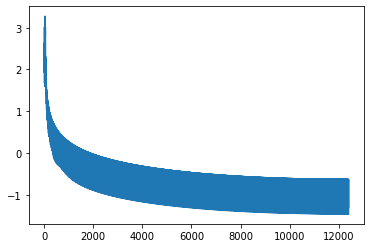

In [16]:
plt.plot(range(len(Widmo_u)), table_log(Widmo_u))

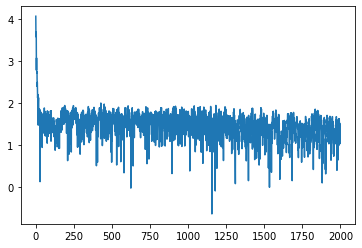

In [17]:
plt.plot(range(len(Widmo_v)), table_log(Widmo_v))

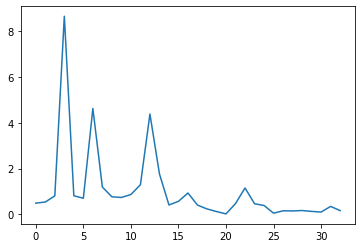

In [18]:
plt.plot(range(len(Widmo_b1)), Widmo_b1)

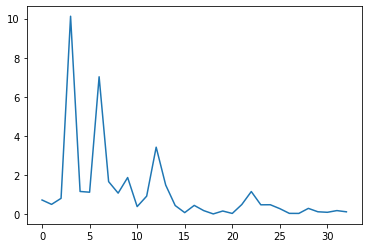

In [19]:
plt.plot(range(len(Widmo_b2)), Widmo_b2)

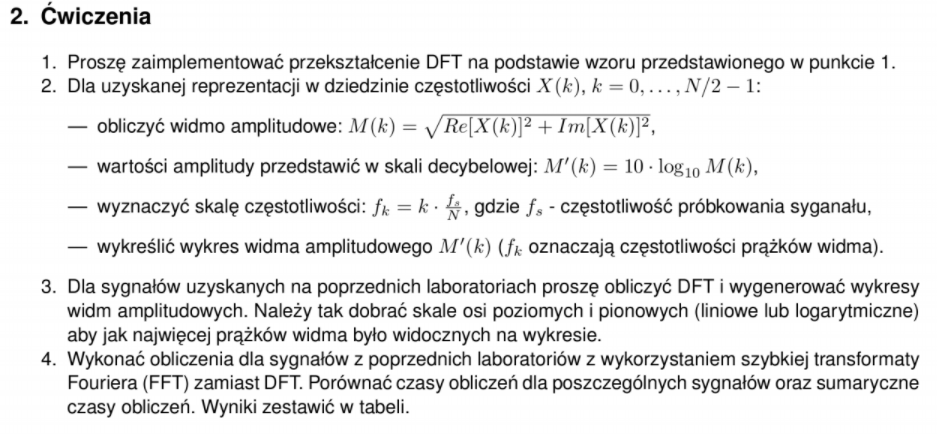

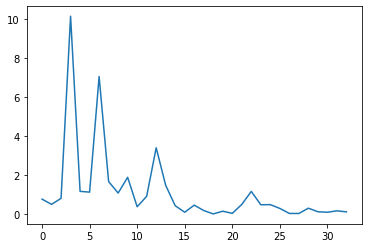

In [20]:
plt.plot(range(len(Widmo_b3)), Widmo_b3)

# FFT Scipy

In [21]:
from scipy.fft import fft

start = time.time()

FFT_x = fft(x)

end = time.time()
x_fft_time = end - start
print(x_fft_time)
start = time.time()

FFT_y = fft(y)

end = time.time()
y_fft_time = end - start
print(y_fft_time)
start = time.time()

FFT_z = fft(z)

end = time.time()
z_fft_time = end - start
print(z_fft_time)
start = time.time()

FFT_v = fft(v)

end = time.time()
v_fft_time = end - start
print(v_fft_time)
start = time.time()

FFT_u = fft(u)

end = time.time()
u_fft_time = end - start
print(u_fft_time)
start = time.time()

FFT_b1 = fft(b_1)

end = time.time()
b1_fft_time = end - start
print(b1_fft_time)
start = time.time()

FFT_b2 = fft(b_2)

end = time.time()
b2_fft_time = end - start
print(b2_fft_time)
start = time.time()

FFT_b3 = fft(b_3)

end = time.time()
b3_fft_time = end - start
print(b3_fft_time)

0.002398967742919922
0.00032830238342285156
0.0003063678741455078
0.00030803680419921875
0.002394437789916992
0.00014901161193847656
0.00012493133544921875
0.00011301040649414062


In [22]:
import numpy as np
import pandas as pd
czasy = pd.DataFrame(np.array([["DFT",x_dft_time,y_dft_time,z_dft_time,u_dft_time,v_dft_time,b1_dft_time,b2_dft_time,b3_dft_time ],["FFT",x_fft_time,y_fft_time,z_fft_time,u_fft_time,v_fft_time,b1_fft_time,b2_fft_time,b3_fft_time]]), columns=["transformata","x","y","z","u","v","b1","b2","b3"]).set_index('transformata').astype(float)
czasy

,x,y,z,u,v,b1,b2,b3
transformata,,,,,,,,
DFT,5.323668,5.399976,5.335984,209.053711,5.362835,0.001568,0.001543,0.001568
FFT,0.002399,0.000328,0.000306,0.002394,0.000308,0.000149,0.000125,0.000113


In [23]:
#Laczne czasy w sekundach
czasy.sum(axis=1)

transformata
DFT    230.480854
FFT      0.006123
dtype: float64